In [23]:
from typing import Dict, TypedDict, List
from langgraph.graph import StateGraph
import math

In [24]:
class AgentState(TypedDict):
    values: List[int]
    name: str
    operation: str
    result: str 

In [25]:
def calculate_node(state: AgentState) -> AgentState:
    """
    This function handles multiple different inputs
    """

    message = f"Hi {state["name"]}, your answer is: "

    if state["operation"] == "+":
        state["result"] = f"{message}{sum(state["values"])}"
    elif state["operation"] == "*":
        state["result"] = f"{message}{math.prod(state["values"])}"
    else:
        state["result"] = f"{state["operation"]} operation is not supported!"

    return state

In [26]:
graph = StateGraph(AgentState)

graph.add_node("calculate", calculate_node)

graph.set_entry_point("calculate")
graph.set_finish_point("calculate")

app = graph.compile()

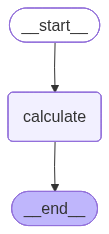

In [27]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [28]:
result = app.invoke({"name": "Jarryd", "values": [1,2,3,4], "operation": "*"})

In [29]:
print(result["result"])

Hi Jarryd, your answer is: 24
